c:\users\saravanakumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\saravanakumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


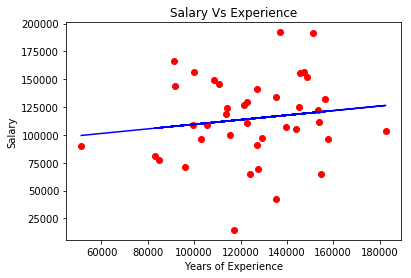

In [29]:
# Data Processing 

# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing dataset

dataset = pd.read_csv("50_Startups.csv")

# Initialize x variable

x = dataset.iloc[:,:-1].values

# Initialize y variable

y = dataset.iloc[:,4].values

# Encoding categorical data
# Enconding the independent variable

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEncoder_x = LabelEncoder()
x[:,3] = labelEncoder_x.fit_transform(x[:,3])

oneHotEncoder = OneHotEncoder(categorical_features=[3])
x=oneHotEncoder.fit_transform(x).toarray()

# Avoiding dummy variable trap
x = x[:,1:]

# Splitting the dataset into trainset and testset

from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Building the optimal model using backward elimination
import statsmodels.formula.api as sm
x = np.append(arr = np.ones((50,1)).astype(int), values = x , axis = 1)

x_options = x[:,[0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = x_options).fit()

x_options = x[:,[0,1,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = x_options).fit()

x_options = x[:,[0,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = x_options).fit()

x_options = x[:,[0,3,5]]
regressor_OLS = sm.OLS(endog = y, exog = x_options).fit()

x_options = x[:,[0,3]]
regressor_OLS = sm.OLS(endog = y, exog = x_options).fit()

# Change the train and test set
x_train = x_train[:,[3]]
x_test = x_test[:,[3]]

# Fitting the Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predict the Test set Results
y_pred = regressor.predict(x_test)

# Visualizing the Training set Results
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, regressor.predict(x_train), color = "blue")
plt.title("Salary Vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()